# 15 Minute Series: Analysis of San Diego
---

*Cara Higashi, Robert Lopez, Joseph Sy, Giovanni Ramos Gutierrez*

In [1]:
import pandas as pd
import geopandas as gpd
import warnings

warnings.simplefilter('ignore')

In [2]:
census_path = './data/cities/cb_2022_us_place_500k.shp'

census_gdf = gpd.read_file(census_path, geometry='geometry')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/tljh/user/share/proj failed


In [3]:
from functions.crs_col import set_crs

set_crs(census_gdf).head()

STATEFP PLACEFP   PLACENS          AFFGEOID    GEOID            NAME  \
0      06   55156  02411359  1600000US0655156  0655156        Palmdale   
1      06   22804  02410455  1600000US0622804  0622804       Escondido   
2      12   16525  02404197  1600000US1216525  1216525   Daytona Beach   
3      12   05150  02405235  1600000US1205150  1205150  Belleair Shore   
4      17   30926  02394961  1600000US1730926  1730926    Granite City   

              NAMELSAD STUSPS  STATE_NAME LSAD      ALAND   AWATER  \
0        Palmdale city     CA  California   25  274705334   629569   
1       Escondido city     CA  California   25   96726218   276445   
2   Daytona Beach city     FL     Florida   25  174516209  6887767   
3  Belleair Shore town     FL     Florida   43     154028   432786   
4    Granite City city     IL    Illinois   25   49248341  4048185   

                                            geometry  
0  POLYGON ((-118.28773 34.58140, -118.28770 34.5...  
1  MULTIPOLYGON (((-117.02372 33.18060, -117.0219...  
2  MULTIPOLYGON (((-81.12724 29.13686, -81.12568 ...  
3  POLYGON ((-82.84783 27.91020, -82.84485 27.924...  
4  MULTIPOLYGON (((-90.11123 38.70289, -90.10613 ...

In [4]:
census_gdf.shape

(32466, 13)

In [5]:
sd_gdf = census_gdf[(census_gdf['NAME'] == 'San Diego') & (census_gdf['STUSPS'] == 'CA')]

In [6]:
sd_gdf

STATEFP PLACEFP   PLACENS          AFFGEOID    GEOID       NAME  \
21364      06   66000  02411782  1600000US0666000  0666000  San Diego   

             NAMELSAD STUSPS  STATE_NAME LSAD      ALAND     AWATER  \
21364  San Diego city     CA  California   25  844031824  120532755   

                                                geometry  
21364  MULTIPOLYGON (((-116.93192 32.64961, -116.9314...

<Axes: >

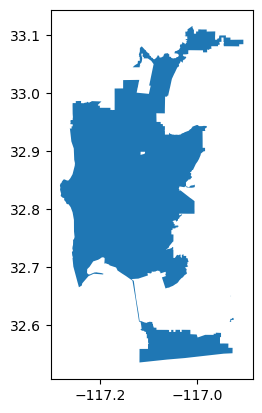

In [7]:
sd_gdf.plot()

## Census Tracts

In [8]:
from geosnap import DataStore

In [9]:
datasets = DataStore('/srv/data/geosnap')

In [10]:
tracts = datasets.acs('2021')

In [11]:
sd_tracts = tracts[tracts['geoid'].str.startswith('06073')]

In [12]:
set_crs(sd_tracts).head()

geoid  n_mexican_pop  n_cuban_pop  n_puerto_rican_pop  \
10522  06073000100          228.0          0.0                21.0   
10523  06073000201           40.0         11.0                 0.0   
10524  06073000202          431.0          0.0                59.0   
10525  06073000301          396.0          0.0                19.0   
10526  06073000302          526.0          0.0                66.0   

       n_russian_pop  n_italian_pop  n_german_pop  n_irish_pop  \
10522           45.0          117.0          34.0         35.0   
10523           13.0          101.0          65.0        112.0   
10524           78.0          233.0         150.0         66.0   
10525            0.0           21.0          83.0         53.0   
10526           13.0           70.0         121.0        132.0   

       n_scandaniavian_pop  n_foreign_born_pop  ...  p_poverty_rate  \
10522                  0.0               277.0  ...        1.623816   
10523                  0.0               216.0  ...        6.323084   
10524                  0.0               879.0  ...        4.217016   
10525                  0.0               439.0  ...       17.155556   
10526                  0.0               199.0  ...        7.102672   

       p_poverty_rate_over_65  p_poverty_rate_children  p_poverty_rate_white  \
10522                0.304465                 0.000000              1.082544   
10523                2.771763                 0.000000              4.677350   
10524                0.000000                 0.123305              3.699137   
10525                0.622222                 2.444444             16.311111   
10526                1.265823                 0.000000              4.887482   

       p_poverty_rate_black  p_poverty_rate_hispanic  p_poverty_rate_native  \
10522               0.00000                 1.116373                    0.0   
10523               0.00000                 0.909485                    0.0   
10524               0.00000                 1.331689                    0.0   
10525               0.00000                 4.888889                    0.0   
10526               2.21519                 3.059072                    0.0   

       p_poverty_rate_asian  \
10522                   0.0   
10523                   0.0   
10524                   0.0   
10525                   0.0   
10526                   0.0   

                                                geometry  year  
10522  MULTIPOLYGON (((-117.19490 32.75278, -117.1947...  2021  
10523  MULTIPOLYGON (((-117.17887 32.75765, -117.1779...  2021  
10524  MULTIPOLYGON (((-117.18404 32.74571, -117.1838...  2021  
10525  MULTIPOLYGON (((-117.16864 32.74897, -117.1684...  2021  
10526  MULTIPOLYGON (((-117.16400 32.74091, -117.1640...  2021  

[5 rows x 158 columns]

In [13]:
sd_tracts.columns.values

array(['geoid', 'n_mexican_pop', 'n_cuban_pop', 'n_puerto_rican_pop',
       'n_russian_pop', 'n_italian_pop', 'n_german_pop', 'n_irish_pop',
       'n_scandaniavian_pop', 'n_foreign_born_pop',
       'n_recent_immigrant_pop', 'n_naturalized_pop',
       'n_russian_born_pop', 'n_italian_born_pop', 'n_german_born_pop',
       'n_irish_born_pop', 'n_scandaniavian_born_pop',
       'n_total_housing_units', 'n_vacant_housing_units',
       'n_occupied_housing_units', 'n_owner_occupied_housing_units',
       'n_renter_occupied_housing_units',
       'n_housing_units_multiunit_structures_denom',
       'n_housing_units_multiunit_structures',
       'n_total_housing_units_sample', 'median_home_value',
       'median_contract_rent', 'n_occupied_housing_units_sample',
       'n_persons_under_18', 'n_persons_over_60', 'n_persons_over_75',
       'n_persons_over_15', 'n_persons_over_25', 'n_married',
       'n_widowed_divorced', 'n_total_families',
       'n_female_headed_families', 'n_nonhisp_wh

In [14]:
variables = ['n_total_pop', 'p_poverty_rate', 'median_household_income', 'per_capita_income', 
             'p_nonhisp_white_persons', 'p_nonhisp_black_persons','p_hispanic_persons', 
             'p_asian_persons']

In [15]:
sd = sd_tracts.loc[:, variables + ['geometry']]

In [16]:
csd = gpd.overlay(sd_gdf, sd, how='identity')

In [17]:
csd.head()

STATEFP PLACEFP   PLACENS          AFFGEOID    GEOID       NAME  \
0      06   66000  02411782  1600000US0666000  0666000  San Diego   
1      06   66000  02411782  1600000US0666000  0666000  San Diego   
2      06   66000  02411782  1600000US0666000  0666000  San Diego   
3      06   66000  02411782  1600000US0666000  0666000  San Diego   
4      06   66000  02411782  1600000US0666000  0666000  San Diego   

         NAMELSAD STUSPS  STATE_NAME LSAD  ...       AWATER  n_total_pop  \
0  San Diego city     CA  California   25  ...  120532755.0       2956.0   
1  San Diego city     CA  California   25  ...  120532755.0       2309.0   
2  San Diego city     CA  California   25  ...  120532755.0       4116.0   
3  San Diego city     CA  California   25  ...  120532755.0       2250.0   
4  San Diego city     CA  California   25  ...  120532755.0       3042.0   

   p_poverty_rate  median_household_income  per_capita_income  \
0        1.623816                 160990.0            96996.0   
1        6.323084                  94629.0           100047.0   
2        4.217016                  99651.0            66060.0   
3       17.155556                  82788.0            74564.0   
4        7.102672                  71712.0            66441.0   

   p_nonhisp_white_persons  p_nonhisp_black_persons  p_hispanic_persons  \
0                77.604871                 0.000000           14.445196   
1                82.503248                 0.389779            5.326981   
2                71.865889                 0.485909           17.322643   
3                65.111111                 2.311111           19.288889   
4                73.668639                 1.873767           21.071663   

   p_asian_persons                                           geometry  
0         3.958051  POLYGON ((-117.19471 32.75301, -117.19413 32.7...  
1         5.586834  POLYGON ((-117.17797 32.75765, -117.17706 32.7...  
2         6.219631  POLYGON ((-117.18383 32.74608, -117.18376 32.7...  
3         5.377778  POLYGON ((-117.16840 32.74897, -117.16768 32.7...  
4         2.629849  POLYGON ((-117.16400 32.74132, -117.16400 32.7...  

[5 rows x 21 columns]

In [18]:
csd.explore()

## US Schools

In [19]:
schools_path = './data/schools/EDGE_GEOCODE_PUBLICSCH_2223.shp'

In [20]:
schools = gpd.read_file(schools_path, geometry='geometry')

In [21]:
set_crs(schools).head()

NCESSCH    LEAID                               NAME OPSTFIPS  \
0  010000500870  0100005          Albertville Middle School       01   
1  010000500871  0100005            Albertville High School       01   
2  010000500879  0100005    Albertville Intermediate School       01   
3  010000500889  0100005      Albertville Elementary School       01   
4  010000501616  0100005  Albertville Kindergarten and PreK       01   

                STREET         CITY STATE    ZIP STFIP   CNTY  ... CBSATYPE  \
0    600 E Alabama Ave  Albertville    AL  35950    01  01095  ...        2   
1     402 E McCord Ave  Albertville    AL  35950    01  01095  ...        2   
2   901 W McKinney Ave  Albertville    AL  35950    01  01095  ...        2   
3   145 West End Drive  Albertville    AL  35950    01  01095  ...        2   
4  257 Country Club Rd  Albertville    AL  35951    01  01095  ...        2   

  CSA  NMCSA  NECTA NMNECTA    CD   SLDL   SLDU SCHOOLYEAR  \
0   N      N      N       N  0104  01026  01009  2022-2023   
1   N      N      N       N  0104  01026  01009  2022-2023   
2   N      N      N       N  0104  01026  01009  2022-2023   
3   N      N      N       N  0104  01026  01009  2022-2023   
4   N      N      N       N  0104  01026  01009  2022-2023   

                     geometry  
0  POINT (-86.20620 34.26020)  
1  POINT (-86.20490 34.26220)  
2  POINT (-86.22010 34.27330)  
3  POINT (-86.22181 34.25270)  
4  POINT (-86.19330 34.28980)  

[5 rows x 26 columns]

In [22]:
schools.columns.values

array(['NCESSCH', 'LEAID', 'NAME', 'OPSTFIPS', 'STREET', 'CITY', 'STATE',
       'ZIP', 'STFIP', 'CNTY', 'NMCNTY', 'LOCALE', 'LAT', 'LON', 'CBSA',
       'NMCBSA', 'CBSATYPE', 'CSA', 'NMCSA', 'NECTA', 'NMNECTA', 'CD',
       'SLDL', 'SLDU', 'SCHOOLYEAR', 'geometry'], dtype=object)

In [23]:
from functions.dup_col import duplicate_columns

In [24]:
duplicate_columns(csd, schools)

Duplicate column names found:
- geometry
- NAME


In [25]:
schools.head()

NCESSCH    LEAID                               NAME OPSTFIPS  \
0  010000500870  0100005          Albertville Middle School       01   
1  010000500871  0100005            Albertville High School       01   
2  010000500879  0100005    Albertville Intermediate School       01   
3  010000500889  0100005      Albertville Elementary School       01   
4  010000501616  0100005  Albertville Kindergarten and PreK       01   

                STREET         CITY STATE    ZIP STFIP   CNTY  ... CBSATYPE  \
0    600 E Alabama Ave  Albertville    AL  35950    01  01095  ...        2   
1     402 E McCord Ave  Albertville    AL  35950    01  01095  ...        2   
2   901 W McKinney Ave  Albertville    AL  35950    01  01095  ...        2   
3   145 West End Drive  Albertville    AL  35950    01  01095  ...        2   
4  257 Country Club Rd  Albertville    AL  35951    01  01095  ...        2   

  CSA  NMCSA  NECTA NMNECTA    CD   SLDL   SLDU SCHOOLYEAR  \
0   N      N      N       N  0104  01026  01009  2022-2023   
1   N      N      N       N  0104  01026  01009  2022-2023   
2   N      N      N       N  0104  01026  01009  2022-2023   
3   N      N      N       N  0104  01026  01009  2022-2023   
4   N      N      N       N  0104  01026  01009  2022-2023   

                     geometry  
0  POINT (-86.20620 34.26020)  
1  POINT (-86.20490 34.26220)  
2  POINT (-86.22010 34.27330)  
3  POINT (-86.22181 34.25270)  
4  POINT (-86.19330 34.28980)  

[5 rows x 26 columns]

In [26]:
from functions.rn_col import rename_column

In [27]:
rename_column(schools, old='NAME', new='SCHOOL_NAME')

schools.head()

NCESSCH    LEAID                        SCHOOL_NAME OPSTFIPS  \
0  010000500870  0100005          Albertville Middle School       01   
1  010000500871  0100005            Albertville High School       01   
2  010000500879  0100005    Albertville Intermediate School       01   
3  010000500889  0100005      Albertville Elementary School       01   
4  010000501616  0100005  Albertville Kindergarten and PreK       01   

                STREET         CITY STATE    ZIP STFIP   CNTY  ... CBSATYPE  \
0    600 E Alabama Ave  Albertville    AL  35950    01  01095  ...        2   
1     402 E McCord Ave  Albertville    AL  35950    01  01095  ...        2   
2   901 W McKinney Ave  Albertville    AL  35950    01  01095  ...        2   
3   145 West End Drive  Albertville    AL  35950    01  01095  ...        2   
4  257 Country Club Rd  Albertville    AL  35951    01  01095  ...        2   

  CSA  NMCSA  NECTA NMNECTA    CD   SLDL   SLDU SCHOOLYEAR  \
0   N      N      N       N  0104  01026  01009  2022-2023   
1   N      N      N       N  0104  01026  01009  2022-2023   
2   N      N      N       N  0104  01026  01009  2022-2023   
3   N      N      N       N  0104  01026  01009  2022-2023   
4   N      N      N       N  0104  01026  01009  2022-2023   

                     geometry  
0  POINT (-86.20620 34.26020)  
1  POINT (-86.20490 34.26220)  
2  POINT (-86.22010 34.27330)  
3  POINT (-86.22181 34.25270)  
4  POINT (-86.19330 34.28980)  

[5 rows x 26 columns]

In [28]:
sd_schools = schools[(schools['STATE'] == 'CA') & (schools['CITY'] == 'San Diego')]

<Axes: >

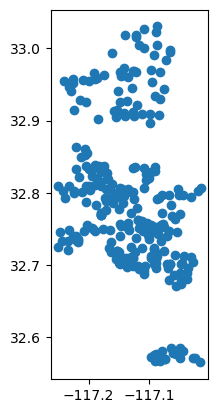

In [29]:
sd_schools.plot()

In [30]:
sds_sj = gpd.sjoin(sd_schools, csd, how='left', predicate='within').drop(columns=['index_right'])

sds_sj.head()

NCESSCH    LEAID                      SCHOOL_NAME OPSTFIPS  \
6199  060013811406  0600138             San Diego County ROP       06   
6412  060146814198  0601468         America's Finest Charter       06   
6425  060148312630  0601483  San Diego Global Vision Academy       06   
6444  060150313795  0601503                          Elevate       06   
6453  060151511386  0601515        High Tech High Media Arts       06   

                     STREET       CITY STATE    ZIP STFIP   CNTY  ...  \
6199   6401 Linda Vista Rd.  San Diego    CA  92111    06  06073  ...   
6412           730 45th St.  San Diego    CA  92102    06  06073  ...   
6425           3430 Sch St.  San Diego    CA  92116    06  06073  ...   
6444  2285 Murray Ridge Rd.  San Diego    CA  92123    06  06073  ...   
6453       2230 Truxtun Rd.  San Diego    CA  92106    06  06073  ...   

            ALAND       AWATER  n_total_pop  p_poverty_rate  \
6199  844031824.0  120532755.0       5189.0       17.190210   
6412  844031824.0  120532755.0       4800.0       23.729167   
6425  844031824.0  120532755.0       3269.0       10.033649   
6444  844031824.0  120532755.0       4013.0        4.684774   
6453  844031824.0  120532755.0       4290.0        3.840246   

     median_household_income per_capita_income p_nonhisp_white_persons  \
6199                 81372.0           40661.0               45.789169   
6412                 61473.0           20874.0                6.062500   
6425                 70758.0           43277.0               47.629244   
6444                149132.0           53831.0               52.628956   
6453                 96413.0           42400.0               50.093240   

     p_nonhisp_black_persons p_hispanic_persons p_asian_persons  
6199                3.064174          35.825785       13.702062  
6412               14.333333          65.916667       11.166667  
6425                2.324870          37.503824        5.445090  
6444                6.653377          12.758535       23.398953  
6453                5.384615          21.561772       16.013986  

[5 rows x 46 columns]

In [31]:
sds_sj.explore()

## Hospitals

In [32]:
us_h_path = './data/hospitals/Hospitals.shp'

In [33]:
us_h = gpd.read_file(us_h_path, geometry='geometry')

In [34]:
set_crs(us_h).head()

OBJECTID          ID                          NAME  \
0         1  0001336420              ANDALUSIA HEALTH   
1         2  0001535611     ATHENS LIMESTONE HOSPITAL   
2         3  0000136502     ATMORE COMMUNITY HOSPITAL   
3         4  0000236124   BAPTIST MEDICAL CENTER EAST   
4         5  0001736111  BAPTIST MEDICAL CENTER SOUTH   

                                    ADDRESS        CITY STATE    ZIP  \
0  849 SOUTH THREE NOTCH STREET, PO BOX 760   ANDALUSIA    AL  36420   
1                    700 WEST MARKET STREET      ATHENS    AL  35611   
2                       401 MEDICAL PARK DR      ATMORE    AL  36502   
3            400 TAYLOR ROAD, PO BOX 241267  MONTGOMERY    AL  36117   
4   2105 EAST SOUTH BOULEVARD, PO BOX 11010  MONTGOMERY    AL  36111   

            ZIP4       TELEPHONE                TYPE  ...  \
0  NOT AVAILABLE  (334) 222-8466  GENERAL ACUTE CARE  ...   
1  NOT AVAILABLE  (256) 262-6468  GENERAL ACUTE CARE  ...   
2  NOT AVAILABLE  (251) 368-2500  GENERAL ACUTE CARE  ...   
3           1267  (334) 747-4410  GENERAL ACUTE CARE  ...   
4           0010  (334) 286-2100  GENERAL ACUTE CARE  ...   

                                             WEBSITE  STATE_ID       ALT_NAME  \
0           http://www.andalusiaregionalhospital.com     H2001  NOT AVAILABLE   
1             http://www.athenslimestonehospital.com     H4201  NOT AVAILABLE   
2  http://www.ebaptisthealthcare.org/atmorecommun...     H2704  NOT AVAILABLE   
3                        http://www.baptistfirst.org     H5107  NOT AVAILABLE   
4                        http://www.baptistfirst.org     H5102  NOT AVAILABLE   

  ST_FIPS                            OWNER  TTL_STAFF  BEDS         TRAUMA  \
0      01                      PROPRIETARY       -999    88      LEVEL III   
1      01                      PROPRIETARY       -999    71      LEVEL III   
2      01                       NON-PROFIT       -999    51      LEVEL III   
3      01  GOVERNMENT - DISTRICT/AUTHORITY       -999   150  NOT AVAILABLE   
4      01  GOVERNMENT - DISTRICT/AUTHORITY       -999   432       LEVEL II   

  HELIPAD                    geometry  
0       Y  POINT (-86.49455 31.29580)  
1       N  POINT (-86.97841 34.80416)  
2       Y  POINT (-87.47880 31.01702)  
3       Y  POINT (-86.17493 32.37640)  
4       Y  POINT (-86.27755 32.32815)  

[5 rows x 33 columns]

In [35]:
us_h.columns.values

array(['OBJECTID', 'ID', 'NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP',
       'ZIP4', 'TELEPHONE', 'TYPE', 'STATUS', 'POPULATION', 'COUNTY',
       'COUNTYFIPS', 'COUNTRY', 'LATITUDE', 'LONGITUDE', 'NAICS_CODE',
       'NAICS_DESC', 'SOURCE', 'SOURCEDATE', 'VAL_METHOD', 'VAL_DATE',
       'WEBSITE', 'STATE_ID', 'ALT_NAME', 'ST_FIPS', 'OWNER', 'TTL_STAFF',
       'BEDS', 'TRAUMA', 'HELIPAD', 'geometry'], dtype=object)

In [36]:
sd_h = us_h[(us_h['STATE'] == 'CA') & (us_h['CITY'] == 'SAN DIEGO')]

sd_h.head()

OBJECTID          ID                                  NAME  \
550       554  0036992123  RADY CHILDREN'S HOSPITAL - SAN DIEGO   
551       555  0042492123               SHARP MEMORIAL HOSPITAL   
553       557  0020092120     KAISER FOUNDATION HOSPITAL - ZION   
561       565  0002692128                      AURORA SAN DIEGO   
562       566  0042392111                 SHARP MCDONALD CENTER   

                      ADDRESS       CITY STATE    ZIP  ZIP4       TELEPHONE  \
550        3020 CHILDRENS WAY  SAN DIEGO    CA  92123  4223  (858) 966-3001   
551             7901 FROST ST  SAN DIEGO    CA  92123  2701  (858) 939-3400   
553             4647 ZION AVE  SAN DIEGO    CA  92120  2507  (619) 528-6295   
561  11878 AVENUE OF INDUSTRY  SAN DIEGO    CA  92128  3423  (858) 487-3200   
562       7989 LINDA VISTA RD  SAN DIEGO    CA  92111  5106  (858) 576-1200   

                   TYPE  ...        WEBSITE   STATE_ID  \
550            CHILDREN  ...  NOT AVAILABLE  080000023   
551  GENERAL ACUTE CARE  ...  NOT AVAILABLE  080000036   
553  GENERAL ACUTE CARE  ...  NOT AVAILABLE  080000144   
561         PSYCHIATRIC  ...  NOT AVAILABLE  080000665   
562      REHABILITATION  ...  NOT AVAILABLE  080000705   

                                 ALT_NAME ST_FIPS        OWNER  TTL_STAFF  \
550  RADY CHILDREN'S HOSPITAL - SAN DIEGO      06   NON-PROFIT       -999   
551               SHARP MEMORIAL HOSPITAL      06   NON-PROFIT       -999   
553           KAISER FOUNDATION HOSPITALS      06   NON-PROFIT       -999   
561                 AURORA SAN DIEGO, LLC      06  PROPRIETARY       -999   
562               SHARP MEMORIAL HOSPITAL      06   NON-PROFIT       -999   

     BEDS             TRAUMA HELIPAD                     geometry  
550   444  LEVEL I PEDIATRIC       Y  POINT (-117.15130 32.79796)  
551   656           LEVEL II       Y  POINT (-117.15447 32.79928)  
553   368      NOT AVAILABLE       N  POINT (-117.09516 32.79156)  
561   101      NOT AVAILABLE       N  POINT (-117.07532 32.99118)  
562    16      NOT AVAILABLE       N  POINT (-117.15448 32.80601)  

[5 rows x 33 columns]

In [37]:
sdh_sj = gpd.sjoin(sd_h, csd, how='left', predicate='within').drop(columns=['index_right'])

sdh_sj.head()

OBJECTID          ID                             NAME_left  \
550       554  0036992123  RADY CHILDREN'S HOSPITAL - SAN DIEGO   
551       555  0042492123               SHARP MEMORIAL HOSPITAL   
553       557  0020092120     KAISER FOUNDATION HOSPITAL - ZION   
561       565  0002692128                      AURORA SAN DIEGO   
562       566  0042392111                 SHARP MCDONALD CENTER   

                      ADDRESS       CITY STATE    ZIP  ZIP4       TELEPHONE  \
550        3020 CHILDRENS WAY  SAN DIEGO    CA  92123  4223  (858) 966-3001   
551             7901 FROST ST  SAN DIEGO    CA  92123  2701  (858) 939-3400   
553             4647 ZION AVE  SAN DIEGO    CA  92120  2507  (619) 528-6295   
561  11878 AVENUE OF INDUSTRY  SAN DIEGO    CA  92128  3423  (858) 487-3200   
562       7989 LINDA VISTA RD  SAN DIEGO    CA  92111  5106  (858) 576-1200   

                   TYPE  ...        ALAND       AWATER n_total_pop  \
550            CHILDREN  ...  844031824.0  120532755.0      5438.0   
551  GENERAL ACUTE CARE  ...  844031824.0  120532755.0      5438.0   
553  GENERAL ACUTE CARE  ...  844031824.0  120532755.0      3426.0   
561         PSYCHIATRIC  ...  844031824.0  120532755.0      4452.0   
562      REHABILITATION  ...  844031824.0  120532755.0      3153.0   

    p_poverty_rate median_household_income  per_capita_income  \
550      14.921031                 91583.0            34681.0   
551      14.921031                 91583.0            34681.0   
553       8.406305                 79847.0            42949.0   
561       3.981154                 96711.0            47220.0   
562      14.490818                 71991.0            31771.0   

     p_nonhisp_white_persons p_nonhisp_black_persons p_hispanic_persons  \
550                44.814270                9.893343          25.818316   
551                44.814270                9.893343          25.818316   
553                60.507881                6.100409          21.949796   
561                40.700809                2.628032          24.123989   
562                42.530923                3.425309          23.025690   

    p_asian_persons  
550       14.417065  
551       14.417065  
553        4.407472  
561       28.099730  
562       21.249604  

[5 rows x 53 columns]

In [38]:
sdh_sj.explore()

### SD Transit

In [39]:
ts_path = './data/sd_transit/transit_stops_datasd.geojson'

In [40]:
sd_ts = gpd.read_file(ts_path, geometry='geometry')

In [41]:
set_crs(sd_ts).head()

objectid    stop_uid stop_id  stop_code                        stop_name  \
0         1  MTS_11tbro  11tbro          0              11th Ave & Broadway   
1         2    MTS_12tS    12tS          0          12th & Imperial Station   
2         3    MTS_imtS    imtS          0  12th & Imperial Station Bayside   
3         4   MTS_imp12   imp12          0   12th & Imperial Transit Center   
4         5    MTS_24tS    24tS          0              24th Street Station   

    stop_lat    stop_lon stop_agncy  wheelchair intersec stop_place  \
0  32.716268 -117.154649        MTS           0     None       None   
1  32.706002 -117.153378        MTS           0     None       None   
2  32.705229 -117.154318        MTS           0     None       None   
3  32.705685 -117.152875        MTS           0     None       None   
4  32.661854 -117.108017        MTS           0     None       None   

  parent_sta        lat         lng                     geometry  
0       None  32.716263 -117.154637  POINT (-117.15464 32.71626)  
1       None  32.705997 -117.153366  POINT (-117.15337 32.70600)  
2       None  32.705224 -117.154306  POINT (-117.15431 32.70522)  
3       None  32.705680 -117.152863  POINT (-117.15286 32.70568)  
4       None  32.661849 -117.108005  POINT (-117.10801 32.66185)

In [42]:
sd_ts.stop_agncy.unique()

array(['MTS', 'NCTD'], dtype=object)

In [43]:
sd_bs = sd_ts[sd_ts['stop_agncy'] == 'MTS']

sd_bs.head()

objectid    stop_uid stop_id  stop_code                        stop_name  \
0         1  MTS_11tbro  11tbro          0              11th Ave & Broadway   
1         2    MTS_12tS    12tS          0          12th & Imperial Station   
2         3    MTS_imtS    imtS          0  12th & Imperial Station Bayside   
3         4   MTS_imp12   imp12          0   12th & Imperial Transit Center   
4         5    MTS_24tS    24tS          0              24th Street Station   

    stop_lat    stop_lon stop_agncy  wheelchair intersec stop_place  \
0  32.716268 -117.154649        MTS           0     None       None   
1  32.706002 -117.153378        MTS           0     None       None   
2  32.705229 -117.154318        MTS           0     None       None   
3  32.705685 -117.152875        MTS           0     None       None   
4  32.661854 -117.108017        MTS           0     None       None   

  parent_sta        lat         lng                     geometry  
0       None  32.716263 -117.154637  POINT (-117.15464 32.71626)  
1       None  32.705997 -117.153366  POINT (-117.15337 32.70600)  
2       None  32.705224 -117.154306  POINT (-117.15431 32.70522)  
3       None  32.705680 -117.152863  POINT (-117.15286 32.70568)  
4       None  32.661849 -117.108005  POINT (-117.10801 32.66185)

In [44]:
csd_geo = csd.geometry

In [45]:
csd_gdf = gpd.GeoDataFrame(geometry=csd_geo)

In [46]:
csd_stops = gpd.overlay(sd_bs, csd_gdf, how='intersection')

csd_stops.head()

objectid    stop_uid stop_id  stop_code                      stop_name  \
0         1  MTS_11tbro  11tbro          0            11th Ave & Broadway   
1        25    MTS_ccoS    ccoS          0           City College Station   
2        26  MTS_citcol  citcol          0   City College Trolley Station   
3        77  MTS_marpar  marpar          0  Park & Market Trolley Station   
4       104   MTS_12049   12049      12049                 10th Av & A St   

    stop_lat    stop_lon stop_agncy  wheelchair intersec stop_place  \
0  32.716268 -117.154649        MTS           0     None       None   
1  32.716307 -117.154235        MTS           0     None       None   
2  32.715820 -117.153939        MTS           0     None       None   
3  32.711537 -117.153993        MTS           0     None       None   
4  32.718577 -117.155691        MTS           2    F-S/B      10thb   

  parent_sta        lat         lng                     geometry  
0       None  32.716263 -117.154637  POINT (-117.15464 32.71626)  
1       None  32.716302 -117.154223  POINT (-117.15422 32.71630)  
2       None  32.715815 -117.153927  POINT (-117.15393 32.71581)  
3       None  32.711532 -117.153981  POINT (-117.15398 32.71153)  
4       None  32.718573 -117.155679  POINT (-117.15568 32.71857)

In [47]:
csd_stops.explore()

### San Diego Grocery Stores

In [48]:
bus_path = './data/sd_grocery/business_sites.csv'

In [49]:
bus_df = pd.read_csv(bus_path)

In [50]:
bus_df.columns.values

array(['id', 'apn', 'bcccode', 'ownnam1', 'ownnam2', 'ownnam3', 'careof',
       'strnum', 'strfra', 'strdir', 'strnam', 'strtyp', 'strsrm', 'city',
       'state', 'contry', 'zipcd1', 'zipcd2', 'loccod', 'locnum',
       'locfra', 'locdir', 'locnam', 'loctyp', 'locsrm', 'loccit',
       'bustype', 'point_x', 'point_y', 'geometry'], dtype=object)

In [51]:
from shapely import wkt

In [52]:
bus_df['geometry'] = bus_df['geometry'].apply(wkt.loads)

sdcg = gpd.GeoDataFrame(bus_df, geometry='geometry')

In [53]:
type(sdcg)

geopandas.geodataframe.GeoDataFrame

In [54]:
set_crs(sdcg)

id         apn  bcccode                        ownnam1  \
0            0  7602110600      298              AT&T SERVICES INC   
1            1  7600801704        2   OCEANSIDE SMALL CRAFT HARBOR   
2            2  7600801100       41       OCEANSIDE YACHT CLUB INC   
3            3  7600802400      313          ALOHA RESTAURANTS INC   
4            4  7600801000      492           YEARLEY SHARON&MONTE   
...        ...         ...      ...                            ...   
101808  101808  9500000000      314                    MAL HEE LEE   
101809  101809  9500000000      391                 WIEBER WILLIAM   
101810  101810  9500000000      295   RADIATION ONCOLOGY SOUTH BAY   
101811  101811  9500000000      298    PACIFIC RAILWAY ENTERPRISES   
101812  101812  9500000000      298  NATIONAL RESEARCH CORPORATION   

                             ownnam2                      ownnam3  \
0                                NaN                          NaN   
1                           DISTRICT  MARINA INN OCEANSIDE SUITES   
2                                NaN                          NaN   
3         DBA JOLLY ROGER RESTAURANT                         #119   
4              DBA YEARLEY SAILBOATS                          NaN   
...                              ...                          ...   
101808                   DBA I SUSHI                          NaN   
101809          DBA BOSNS LOCKER THE                          NaN   
101810                           LLC                          NaN   
101811                           INC                          NaN   
101812  DBA GOVERNANCE INSTITUTE THE                   NRC HEALTH   

                       careof  strnum strfra strdir  ... locfra locdir  \
0       C/O PROPERTY TAX DEPT   909.0    NaN    NaN  ...    NaN    NaN   
1                         NaN  2008.0    NaN      N  ...    NaN      N   
2                         NaN  1950.0    NaN      N  ...    NaN      N   
3            ATTN STEVE MOYER   204.0    NaN    NaN  ...    NaN      N   
4                         NaN  1850.0    NaN      N  ...    NaN      N   
...                       ...     ...    ...    ...  ...    ...    ...   
101808                    NaN   945.0    NaN    NaN  ...    NaN    NaN   
101809                    NaN   946.0    NaN    NaN  ...    NaN    NaN   
101810                    NaN   310.0    NaN    NaN  ...    NaN    NaN   
101811                    NaN  3560.0    NaN    NaN  ...    NaN    NaN   
101812                    NaN  1245.0    NaN    NaN  ...    NaN    NaN   

                locnam loctyp locsrm          loccit               bustype  \
0                 11TH     ST    NaN  CAMP PENDLETON     MISC PROFESSIONAL   
1               HARBOR     DR      B       OCEANSIDE         PUBLIC AGENCY   
2               HARBOR     DR    NaN       OCEANSIDE  CLUBS - SOCIAL/SERVI   
3               HARBOR     DR    NaN       OCEANSIDE                  CAFE   
4               HARBOR     DR      B       OCEANSIDE        BOAT&SUPPLIERS   
...                ...    ...    ...             ...                   ...   
101808      OTAY LAKES     RD      N     CHULA VISTA        CAFE-FAST FOOD   
101809      INDUSTRIAL   BLVD    NaN     CHULA VISTA          MACHINE SHOP   
101810            LANE    AVE      B     CHULA VISTA  DOCTOR/OSTEOPA/CHIRO   
101811      CHESAPEAKE     DR    420       SAN DIEGO     MISC PROFESSIONAL   
101812  VIA EXCELENCIA    NaN    100       SAN DIEGO     MISC PROFESSIONAL   

             point_x       point_y                     geometry  
0       6.210715e+06  2.026933e+06  POINT (-117.39762 33.22365)  
1       6.210725e+06  2.021698e+06  POINT (-117.39740 33.20926)  
2       6.210790e+06  2.022669e+06  POINT (-117.39722 33.21193)  
3       6.210974e+06  2.022894e+06  POINT (-117.39663 33.21255)  
4       6.211157e+06  2.023119e+06  POINT (-117.39604 33.21318)  
...              ...           ...                          ...  
101808  6.333138e+06  1.813900e+06  POINT (-116.99235 

<Axes: >

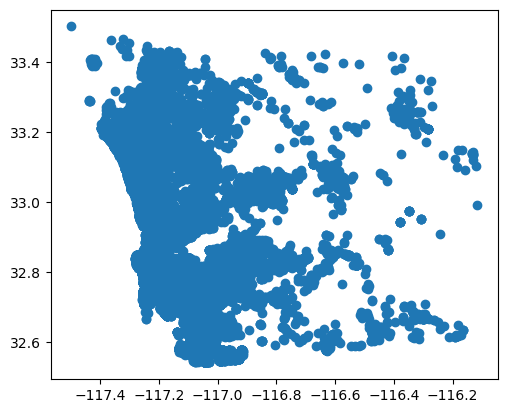

In [55]:
sdcg.plot()

In [56]:
sdst = sdcg[(sdcg['state'] == 'CA') & (sdcg['city'] == 'SAN DIEGO')]

sdst.head()

id         apn  bcccode                         ownnam1  \
10    10  7600801500       63      ACE PARKING MANAGEMENT INC   
18    18  7600800200      131   SAN DIEGO COUNTY CREDIT UNION   
43    43  1503540600      261       CONWAY JAMES M&LOIS R TRS   
91    91  1501810700      261  SANDAGE FAMILY EXEMPTION TRUST   
112  112  1472620900      261          NORTHERN TRUST BANK OF   

                            ownnam2              ownnam3  \
10                  LOT 270-271-272       SEE 6080250000   
18                      KIOSK #D068                  NaN   
43                              NaN                  NaN   
91                            33810  GRETLER BILL&MARY E   
112  CALIFORNIA TR EVANS FRANK E JR                  NaN   

                          careof  strnum strfra strdir  ... locfra locdir  \
10                           NaN   645.0    NaN    NaN  ...    NaN      N   
18                           NaN  6545.0    NaN    NaN  ...    NaN      S   
43                           NaN  8515.0    NaN    NaN  ...    NaN      S   
91   C/O PACIFIC PALM APARTMENTS     0.0    NaN    NaN  ...    NaN      S   
112                          NaN  4370.0    NaN    NaN  ...    NaN      S   

        locnam loctyp locsrm     loccit              bustype       point_x  \
10      HARBOR     DR    NaN  OCEANSIDE         AUTO PARKING  6.211995e+06   
18      HARBOR     DR    NaN  OCEANSIDE  CREDIT UNION EXEMPT  6.212949e+06   
43     PACIFIC     ST    NaN  OCEANSIDE           APARTMENTS  6.213620e+06   
91   CLEVELAND     ST    NaN  OCEANSIDE           APARTMENTS  6.214970e+06   
112    PACIFIC     ST    NaN  OCEANSIDE           APARTMENTS  6.215262e+06   

          point_y                     geometry  
10   2.020975e+06  POINT (-117.39322 33.20731)  
18   2.019838e+06  POINT (-117.39006 33.20422)  
43   2.018388e+06  POINT (-117.38781 33.20025)  
91   2.017402e+06  POINT (-117.38337 33.19758)  
112  2.015812e+06  POINT (-117.38236 33.19322)  

[5 rows x 30 columns]

In [57]:
duplicate_columns(sdst, csd)

Duplicate column names found:
- geometry


In [58]:
sdst.columns.values

array(['id', 'apn', 'bcccode', 'ownnam1', 'ownnam2', 'ownnam3', 'careof',
       'strnum', 'strfra', 'strdir', 'strnam', 'strtyp', 'strsrm', 'city',
       'state', 'contry', 'zipcd1', 'zipcd2', 'loccod', 'locnum',
       'locfra', 'locdir', 'locnam', 'loctyp', 'locsrm', 'loccit',
       'bustype', 'point_x', 'point_y', 'geometry'], dtype=object)

In [59]:
sdg = gpd.sjoin(sdst, csd, how='inner', predicate='within')

sdg.head()

id         apn  bcccode                      ownnam1   ownnam2  \
6511  6511  3505911300       44     SOCIAL SERVICE LEAGUE OF  LA JOLLA   
6659  6659  3505911100      298        20 20 EYEGLASS REPAIR       NaN   
6678  6678  3513813400      261    P A D PROPERTIES GROUP LP       NaN   
6762  6762  3513833500      261  BROWAR MATHEW S&NANCY A TRS       NaN   
6771  6771  3505921900       37                  BIKRAM YOGA       NaN   

               ownnam3                       careof  strnum strfra strdir  \
6511  DBA LEAGUE HOUSE               SEE 6836620000  7457.0    NaN    NaN   
6659               NaN                          NaN  7472.0    NaN    NaN   
6678               NaN                          NaN  7964.0    NaN    NaN   
6762               NaN  C/O SAN DIEGO PROPERTY MGMT     0.0    NaN    NaN   
6771               NaN                          NaN   565.0    NaN    NaN   

      ...        ALAND       AWATER n_total_pop p_poverty_rate  \
6511  ...  844031824.0  120532755.0      3645.0       6.314613   
6659  ...  844031824.0  120532755.0      3645.0       6.314613   
6678  ...  844031824.0  120532755.0      3645.0       6.314613   
6762  ...  844031824.0  120532755.0      3645.0       6.314613   
6771  ...  844031824.0  120532755.0      3645.0       6.314613   

     median_household_income per_capita_income  p_nonhisp_white_persons  \
6511                 89058.0           77890.0                87.379973   
6659                 89058.0           77890.0                87.379973   
6678                 89058.0           77890.0                87.379973   
6762                 89058.0           77890.0                87.379973   
6771                 89058.0           77890.0                87.379973   

      p_nonhisp_black_persons  p_hispanic_persons  p_asian_persons  
6511                 0.329218            7.105624         3.676269  
6659                 0.329218            7.105624         3.676269  
6678                 0.329218            7.105624         3.676269  
6762                 0.329218            7.105624         3.676269  
6771                 0.329218            7.105624         3.676269  

[5 rows x 51 columns]

<Axes: >

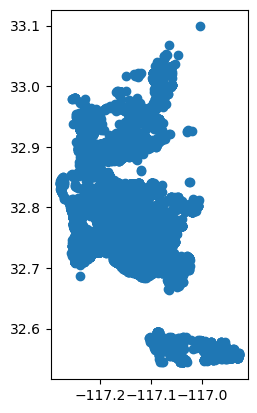

In [60]:
sdg.plot()

### San Diego Parks

In [61]:
park_path = './data/sd_parks/parks_datasd.shp'

In [62]:
sd_park = gpd.read_file(park_path, geometry='geometry')

<Axes: >

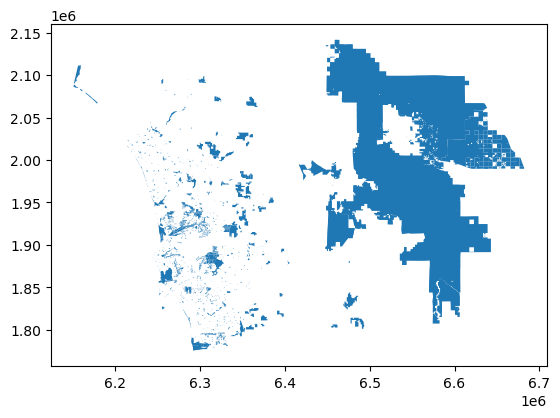

In [63]:
sd_park.plot()

In [64]:
set_crs(sd_park).head()

objectid                     name                       alias   gis_acres  \
0         1        South Carlsbad SB  South Carlsbad State Beach  115.895878   
1         2          Torrey Pines SB    Torrey Pines State Beach   67.294309   
2         3              Ruocco Park                 Ruocco Park    3.312526   
3         4         Tuna Harbor Park            Tuna Harbor Park    0.639035   
4         5  San Diego Bayfront Park     San Diego Bayfront Park    3.669272   

  park_type                                    location        owner  \
0     State                                        None  State Parks   
1     State                                        None  State Parks   
2     Local        585 Harbor Ln, San Diego. California        SDUPD   
3     Local  700 North Harbor Dr, San Diego. California        SDUPD   
4     Local   One Park Boulevard, San Diego. California        SDUPD   

  source_id       source source_dt src_notes  \
0       652  State Parks      0416      None   
1       631  State Parks      0416      None   
2      None        SDUPD      0416      None   
3      None        SDUPD      0416      None   
4      None        SDUPD      0416      None   

                                            geometry  
0  MULTIPOLYGON (((6231349.52500 1990253.03750, 6...  
1  POLYGON ((6251344.28400 1922876.49950, 6251350...  
2  POLYGON ((6278279.34750 1839865.88000, 6278277...  
3  POLYGON ((6277838.87600 1839990.12150, 6277846...  
4  MULTIPOLYGON (((6281595.04500 1837289.73575, 6...

In [65]:
sd_park.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<Axes: >

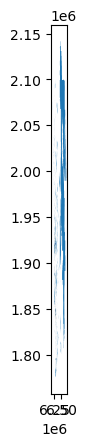

In [66]:
sd_park.plot()

In [67]:
# csd_park = sd_park[sd_park.geometry.within(csd.unary_union)]

In [68]:
# csd_park